# These are the Cartography visuals.

# Imports Section 

In [1]:
import sys
sys.path.append("../notebooks/scripts/")

In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive, scatterplot_with_tooltip
from Helpers import get_y_positions

%matplotlib inline

In [3]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [4]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 120
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rc('text', usetex=False)

In [5]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [6]:
colors = snakemake.input.colors
node_df = snakemake.input.node_df

pca_df = snakemake.input.pca_df
explained_variance_pca = snakemake.input.explained_variance_pca

mds_df = snakemake.input.mds_df
tsne_df = snakemake.input.tsne_df
umap_df = snakemake.input.umap_df

#Scatterplot:
scatterplot_pca = snakemake.input.scatterplot_pca
scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

scatterplot_mds = snakemake.input.scatterplot_mds
scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

scatterplot_tsne = snakemake.input.scatterplot_tsne
scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

scatterplot_umap = snakemake.input.scatterplot_umap
scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

In [7]:
clades_to_plot = ['3c', '3c2', '3c2.A', '3c3', '3c3.A', '3c3.B','A1','A1a','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A2', 'A2/re', 'A3', 'A4'] 
domain =  ['3c', '3c2', '3c2.A', '3c3', '3c3.A', '3c3.B','A1','A1a','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A2', 'A2/re', 'A3', 'A4'] 
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36','#dc2f24']

# Reading in all the data from the scripts

In [22]:
node_df = pd.read_csv(node_df, sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)
node_df = node_df.take(node_df["clade_membership"].dropna().index.values.tolist())

In [23]:
colors = pd.read_csv(colors, sep="\t", names=[i for i in range(0,101)])

In [24]:
domain =  node_df["clade_membership"].drop_duplicates().values
range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]

In [25]:
node_df.head()

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0      A/Chungbuk/107/2016  2016.05 -2.09  4.72 -0.45 -0.68 -13.86  18.39   
1  A/MUWRP-Uganda/579/2016  2016.67 -1.74  5.09 -0.58 -0.58   0.94  39.78   
2       A/Shiraz/1011/2015  2015.89 -2.02  4.98 -0.49 -0.65 -31.38  17.41   
3       A/Shiraz/1019/2016  2016.00 -2.16  4.96 -0.46 -0.71 -28.43  16.79   
4       A/Shiraz/1020/2016  2016.02 -2.17  4.96 -0.48 -0.71 -11.56  29.00   

   tsne_x  tsne_y  ...  clade_membership  pca_label mds_label  umap_label  \
0  -18.23  -16.05  ...               3c3          5        -1           9   
1  -17.87  -16.17  ...               3c3          5        -1           8   
2  -18.72  -15.57  ...             3c3.B          5        -1           8   
3  -18.67  -15.61  ...               3c3          5        -1           8   
4  -18.64  -15.64  ...               3c3          5        -1           8   

   t-sne_label  pca_label_default  mds_label_default  umap_label_default  \
0           19                  2                 -1                  -1   
1           19                  2                 -1                  -1   
2           19                  2                 -1                  -1   
3           19                  2                 -1                  -1   
4           19                  2                 -1                  25   

   t-sne_label_default  y  
0                   57  1  
1                   57  2  
2                   57  3  
3                   57  4  
4                   57  5  

[5 rows x 22 columns]

In [26]:
# Reannotate clades that we aren't interested in as "other" to simplify color assignment in visualizations.
try:
    node_df["clade_membership_color"] = node_df["clade_membership"].apply(lambda clade: clade if clade in clades_to_plot else "other")
except:
    node_df["clade_membership_color"] = node_df["clade_membership"]
    print("clades_to_plot undefined")

clades_to_plot undefined


# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [27]:
principalDf = pd.read_csv(pca_df, index_col=0)

In [28]:
explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df

explained variance  principal components
0              0.2623                     1
1              0.1941                     2
2              0.0797                     3
3              0.0533                     4
4              0.0303                     5
5              0.0258                     6
6              0.0216                     7
7              0.0166                     8
8              0.0147                     9
9              0.0108                    10

NameError: name 'snakemake' is not defined

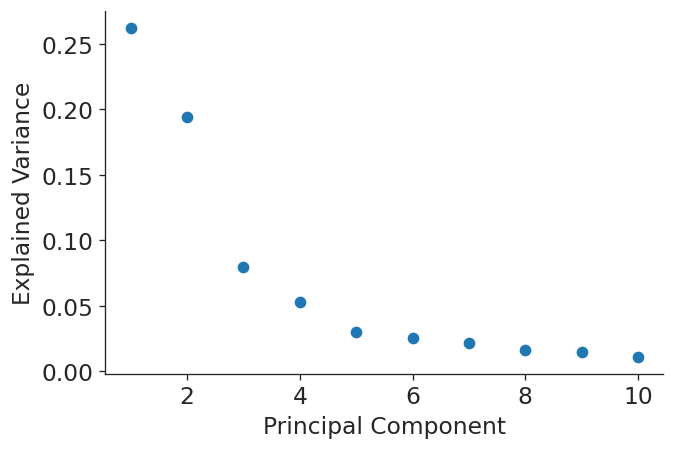

In [29]:
plt.plot(explained_variance_df['principal components'].values.tolist(), explained_variance_df["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.savefig(snakemake.output.Explained_variance_PCA)

In [30]:
merged_pca_df = principalDf.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [31]:
merged_pca_df.head()

strain      pca1      pca2      pca3      pca4      pca5  \
0        A/Alabama/03/2017 -0.664977 -1.380442  0.751640 -1.532640 -0.315902   
1         A/Hawaii/54/2016 -0.811030 -1.404470  0.816939 -1.523961 -0.289484   
2         A/Hawaii/58/2016 -0.957845 -0.923502  0.768859 -1.598405 -0.476477   
3  A/Massachusetts/41/2016 -1.213731 -1.822006  0.638979 -0.775565 -0.744573   
4  A/NorthCarolina/59/2016 -0.812460 -1.406238  0.819346 -1.528930 -0.322112   

       pca6      pca7      pca8      pca9     pca10  pca_label  \
0 -0.031167 -0.944472  0.303219  0.295708 -0.910834          8   
1 -0.022757 -0.960413  0.269073  0.352658 -0.877289          8   
2  0.106367 -1.032552  0.324862  0.530738 -0.700801          8   
3  0.176138 -0.516375 -0.378643 -0.174420 -0.588900          8   
4 -0.034770 -0.973048  0.260170  0.366377 -0.911830          8   

   pca_label_default     date     y clade_membership clade_membership_color  
0                 61  2017.05  1114               A1                     A1  
1                 61  2016.39  1112               A1                     A1  
2                 -1  2016.48  1113               A1                     A1  
3                 -1  2016.91  1115               A1                     A1  
4                 61  2016.87  1118               A1                     A1

In [32]:
explained_variance_PCA = explained_variance_df["explained variance"].values.tolist()

In [33]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

# HDBSCAN Output

In [34]:
list_of_chart = linking_tree_with_plots_clickable(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "pca_label:N",["pca_label"], ['strain'], domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[4]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


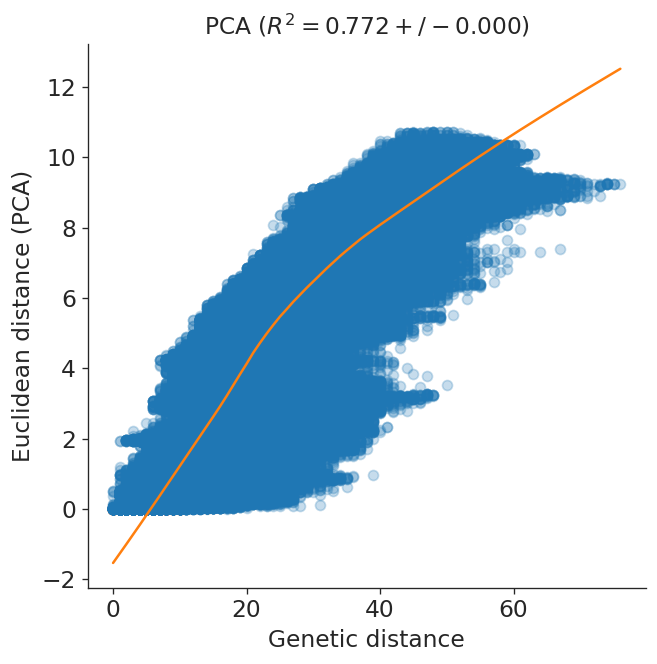

In [35]:
total_df_PCA = pd.read_csv(scatterplot_pca,index_col=0)
metadata_PCA = pd.read_csv(scatterplot_pca_metadata, index_col=0)

#total_df_PCA = pd.read_csv("results/scatterplot_pca.csv",index_col=0)
#metadata_PCA = pd.read_csv("results/scatterplot_pca_metadata.csv", index_col=0)

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (PCA)")
ax.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

# Running MDS on the Dataset

In [36]:
MDS_df = pd.read_csv(mds_df, index_col=0)
#MDS_df = pd.read_csv("results/embed_mds_sequences.csv")

In [37]:
merged_mds_df = MDS_df.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [38]:
merged_mds_df

strain       mds1       mds2  mds_label  \
0           A/Alabama/03/2017   7.486521  -4.107978          7   
1            A/Hawaii/54/2016   6.289464  -0.473252          7   
2            A/Hawaii/58/2016   5.370724  10.168305          7   
3     A/Massachusetts/41/2016   6.925488   9.457653          7   
4     A/NorthCarolina/59/2016   6.294105  -0.386403          7   
...                       ...        ...        ...        ...   
1913     A/HongKong/3391/2017 -15.047440 -14.308079         -1   
1914      A/Keelung/0023/2016 -18.446369  -4.902272         -1   
1915         A/Kenya/013/2017  32.474688  10.463836         -1   
1916  A/MUWRP-Uganda/579/2016  11.500378 -38.282620         -1   
1917     A/India/1732610/2017  38.733713  10.627828         -1   

      mds_label_default     date     y clade_membership clade_membership_color  
0                    -1  2017.05  1114               A1                     A1  
1                    59  2016.39  1112               A1                     A1  
2                    44  2016.48  1113               A1                     A1  
3                    -1  2016.91  1115               A1                     A1  
4                    59  2016.87  1118               A1                     A1  
...                 ...      ...   ...              ...                    ...  
1913                 -1  2017.52   309               A3                     A3  
1914                 -1  2016.02   470            3c2.A                  3c2.A  
1915                 -1  2017.19  1604              A1b                    A1b  
1916                 -1  2016.67     2              3c3                    3c3  
1917                 -1  2017.68  1691         A1b/135N               A1b/135N  

[1918 rows x 9 columns]

In [39]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_12_mds

alt.Chart(...)

In [40]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
list_of_chart[0]|list_of_chart[1]

alt.HConcatChart(...)

# HDBSCAN output:

In [41]:
list_of_chart = linking_tree_with_plots_clickable(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'mds_label:N', ["mds_label"], ['strain','clade_membership'])
list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


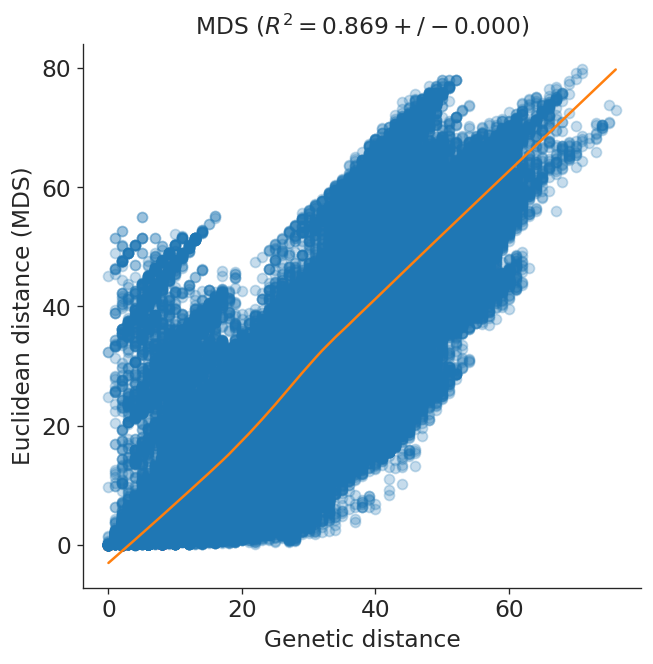

In [42]:
total_df_MDS = pd.read_csv(scatterplot_mds,index_col=0)
metadata_MDS = pd.read_csv(scatterplot_mds_metadata, index_col=0)

#total_df_MDS = pd.read_csv("results/scatterplot_mds.csv",index_col=0)
#metadata_MDS = pd.read_csv("results/scatterplot_mds_metadata.csv", index_col=0)

mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (MDS)")
ax.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

# Running T-SNE on the Dataset 

In [43]:
TSNE_df = pd.read_csv(tsne_df, index_col=0)

In [44]:
TSNE_df.head()

tsne_x     tsne_y  t-sne_label  \
strain                                                       
A/Alabama/03/2017       -31.672865 -11.581188            9   
A/Hawaii/54/2016        -30.826921 -10.610431            9   
A/Hawaii/58/2016        -30.793680 -10.472143            9   
A/Massachusetts/41/2016 -31.348990 -11.984566            9   
A/NorthCarolina/59/2016 -31.329533 -11.863026            9   

                         t-sne_label_default  
strain                                        
A/Alabama/03/2017                         70  
A/Hawaii/54/2016                          70  
A/Hawaii/58/2016                          70  
A/Massachusetts/41/2016                   70  
A/NorthCarolina/59/2016                   70

In [45]:
merged_tsne_df = TSNE_df.merge(
    node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]],
    on="strain"
)

In [46]:
merged_tsne_df.head()

strain     tsne_x     tsne_y  t-sne_label  \
0        A/Alabama/03/2017 -31.672865 -11.581188            9   
1         A/Hawaii/54/2016 -30.826921 -10.610431            9   
2         A/Hawaii/58/2016 -30.793680 -10.472143            9   
3  A/Massachusetts/41/2016 -31.348990 -11.984566            9   
4  A/NorthCarolina/59/2016 -31.329533 -11.863026            9   

   t-sne_label_default     date     y clade_membership clade_membership_color  
0                   70  2017.05  1114               A1                     A1  
1                   70  2016.39  1112               A1                     A1  
2                   70  2016.48  1113               A1                     A1  
3                   70  2016.91  1115               A1                     A1  
4                   70  2016.87  1118               A1                     A1

In [47]:
scatterplot_with_tooltip_interactive(
    merged_tsne_df,
    'tsne_x',
    'tsne_y',
    'tsne_x',
    'tsne_y',
    ['strain', "clade_membership"],
    'clade_membership:N',
    domain,
    range_
)

alt.Chart(...)

In [48]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


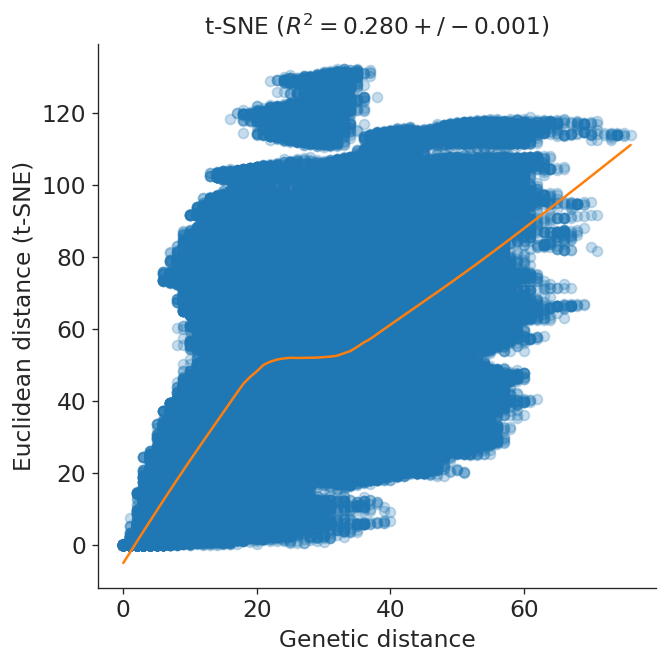

In [49]:
total_df_TSNE = pd.read_csv(scatterplot_tsne,index_col=0)
metadata_TSNE = pd.read_csv(scatterplot_tsne_metadata, index_col=0)

mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (t-SNE)")
ax.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

# Running UMAP on the Dataset

In [50]:
UMAP_df = pd.read_csv(umap_df, index_col=0)

In [51]:
UMAP_df.head()

umap_x     umap_y  umap_label  umap_label_default
strain                                                                      
A/Alabama/03/2017       -2.119267  22.802025           0                  34
A/Hawaii/54/2016        -2.056488  21.636467           0                  35
A/Hawaii/58/2016        -2.362783  22.022260           0                  -1
A/Massachusetts/41/2016 -1.826068  21.897087           0                  -1
A/NorthCarolina/59/2016 -2.017788  21.756428           0                  35

In [52]:
merged_umap_df = UMAP_df.merge(
    node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]],
    on="strain"
)

In [53]:
merged_umap_df.head()

strain    umap_x     umap_y  umap_label  \
0        A/Alabama/03/2017 -2.119267  22.802025           0   
1         A/Hawaii/54/2016 -2.056488  21.636467           0   
2         A/Hawaii/58/2016 -2.362783  22.022260           0   
3  A/Massachusetts/41/2016 -1.826068  21.897087           0   
4  A/NorthCarolina/59/2016 -2.017788  21.756428           0   

   umap_label_default     date     y clade_membership clade_membership_color  
0                  34  2017.05  1114               A1                     A1  
1                  35  2016.39  1112               A1                     A1  
2                  -1  2016.48  1113               A1                     A1  
3                  -1  2016.91  1115               A1                     A1  
4                  35  2016.87  1118               A1                     A1

In [54]:
scatterplot_with_tooltip_interactive(
    merged_umap_df,
    'umap_x',
    'umap_y',
    'umap_x',
    'umap_y',
    ['strain'],
    'clade_membership:N',
    domain,
    range_
)

alt.Chart(...)

In [55]:
list_of_data_and_titles = ['umap_x','umap_y']
list_of_chart = linking_tree_with_plots_brush(
    merged_umap_df,
    list_of_data_and_titles,
    list_of_data_and_titles,
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap
#chart.save("../docs/UMAPMERSBrush.html")

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


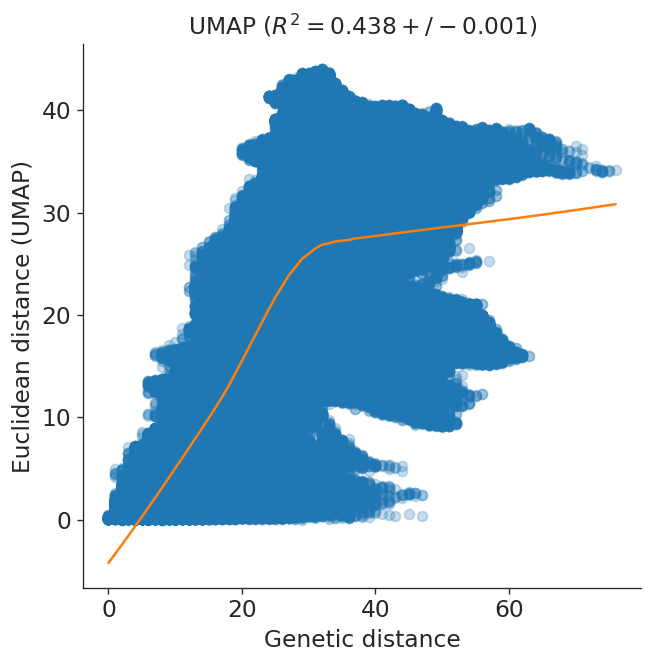

In [56]:
total_df_UMAP = pd.read_csv(scatterplot_umap,index_col=0)
metadata_UMAP = pd.read_csv(scatterplot_umap_metadata, index_col=0)

mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (UMAP)")
ax.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

# Linking all plots together clickable with Tree

In [57]:
merged_df = merged_pca_df.merge(
    MDS_df,
    on="strain",
).merge(
    TSNE_df,
    on="strain",
).merge(
    UMAP_df,
    on="strain",
)

In [58]:
merged_df.head()

strain      pca1      pca2      pca3      pca4      pca5  \
0        A/Alabama/03/2017 -0.664977 -1.380442  0.751640 -1.532640 -0.315902   
1         A/Hawaii/54/2016 -0.811030 -1.404470  0.816939 -1.523961 -0.289484   
2         A/Hawaii/58/2016 -0.957845 -0.923502  0.768859 -1.598405 -0.476477   
3  A/Massachusetts/41/2016 -1.213731 -1.822006  0.638979 -0.775565 -0.744573   
4  A/NorthCarolina/59/2016 -0.812460 -1.406238  0.819346 -1.528930 -0.322112   

       pca6      pca7      pca8      pca9  ...  mds_label  mds_label_default  \
0 -0.031167 -0.944472  0.303219  0.295708  ...          7                 -1   
1 -0.022757 -0.960413  0.269073  0.352658  ...          7                 59   
2  0.106367 -1.032552  0.324862  0.530738  ...          7                 44   
3  0.176138 -0.516375 -0.378643 -0.174420  ...          7                 -1   
4 -0.034770 -0.973048  0.260170  0.366377  ...          7                 59   

      tsne_x     tsne_y  t-sne_label t-sne_label_default    umap_x     umap_y  \
0 -31.672865 -11.581188            9                  70 -2.119267  22.802025   
1 -30.826921 -10.610431            9                  70 -2.056488  21.636467   
2 -30.793680 -10.472143            9                  70 -2.362783  22.022260   
3 -31.348990 -11.984566            9                  70 -1.826068  21.897087   
4 -31.329533 -11.863026            9                  70 -2.017788  21.756428   

   umap_label  umap_label_default  
0           0                  34  
1           0                  35  
2           0                  -1  
3           0                  -1  
4           0                  35  

[5 rows x 29 columns]

In [59]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
    'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [60]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
fullChart.save(snakemake.output.fullChart)
save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

NameError: name 'snakemake' is not defined

In [ ]:
fullChart

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

# Supplemental Figures

In [ ]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)

# HDBSCAN Final Charts

In [ ]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [ ]:
PCA_df = pd.read_csv(pca_df,index_col=0)
MDS_df = pd.read_csv(mds_df,index_col=0)
TSNE_df = pd.read_csv(tsne_df,index_col=0)
UMAP_df = pd.read_csv(umap_df,index_col=0)
explained_variance_df = pd.read_csv(explained_variance_pca)

In [ ]:
merged_tsne_df = TSNE_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [ ]:
domain =  merged_tsne_df["t-sne_label"].drop_duplicates().values
range_ = colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
chart_12_tsne = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'t-sne_label:N', domain, range_).properties(title="t-sne, optimal distance threshold")
domain = merged_tsne_df["t-sne_label_default"].drop_duplicates().values
range_ = colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
chart_12_default = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'t-sne_label_default:N', domain, range_).properties(title="t-sne, default distance threshold")
domain = merged_tsne_df["clade_membership"].drop_duplicates().values
range_ = colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
chart_12_clade = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'clade_membership:N', domain, range_).properties(title="t-sne, clade membership")
charts = alt.hconcat(chart_12_tsne,chart_12_default).resolve_scale(color='independent')
fullChart = alt.hconcat(charts, chart_12_clade).resolve_scale(color='independent')
fullChart
fullChart.save(snakemake.output.SupplementalTSNEHDBSCAN)
save(fullChart, snakemake.output.SupplementalTSNEHDBSCANPNG, scale_factor=2.0)

In [ ]:
from Helpers import get_euclidean_data_frame
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [ ]:
def _get_embedding_columns_by_method(method):
    if method in ("pca"):
        return list(f"{method}1 {method}2 {method}3 {method}4 {method}5 {method}6 {method}7 {method}8 {method}9 {method}10".split())
    if method in ("mds"):
        return list(f"{method}1 {method}2".split())
    if method in ("t-sne"):
        return list("tsne_x tsne_y".split())
    else:
        return list(f"{method}_x {method}_y".split())

In [ ]:
merged_df = node_df[["strain", "date", "clade_membership", "y"]].merge(
    PCA_df,
    on="strain",
).merge(
    MDS_df,
    on="strain",
).merge(
    TSNE_df,
    on="strain",
).merge(
    UMAP_df,
    on="strain",
)

In [ ]:
MCC_val = []

for method in ["pca", "mds", "t-sne", "umap"]:
    KDE_df_normal = get_euclidean_data_frame(sampled_df=merged_df, column_for_analysis="clade_membership", embedding="method", column_list=_get_embedding_columns_by_method(method))

    KDE_df_cluster =  get_euclidean_data_frame(sampled_df=merged_df, column_for_analysis=f"{method}_label", embedding="method", column_list=_get_embedding_columns_by_method(method))

    confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    MCC_val.append(matthews_cc_val)

In [ ]:
domain =  sorted(merged_df["pca_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
PCA = linking_tree_with_plots_brush(
    merged_df,
    ['pca1', 'pca2'],
    ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_df["explained variance"][0]*100,2)) + ")",
    'PCA2 (Explained Variance : {}%'.format(round(explained_variance_df["explained variance"][1]*100,2)) + ")"],
    'pca_label:N',
    ['strain','clade_membership', 'pca_label'],
    domain,
    range_
)
domain =  sorted(merged_df["mds_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
MDS = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2'],
    ['MDS1', 'MDS2'],
    'mds_label:N',
    ['strain','clade_membership', 'mds_label'],
    domain,
    range_
)
domain =  sorted(merged_df["t-sne_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
TSNE = linking_tree_with_plots_brush(
    merged_df,
    ['tsne_x', 'tsne_y'],
    ['TSNE1', 'TSNE2'],
    't-sne_label:N',
    ['strain','clade_membership', 't-sne_label'],
    domain,
    range_
)
domain =  sorted(merged_df["umap_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
UMAP = linking_tree_with_plots_brush(
    merged_df,
    ['umap_x', 'umap_y'],
    ['UMAP1', 'UMAP2'],
    'umap_label:N',
    ['strain','clade_membership', 'umap_label'],
    domain,
    range_
)

In [ ]:
PCAChart = PCA[0]|PCA[1].properties(title= "MCC Value: " + str(round(MCC_val[0],3)))
MDSChart = MDS[0]|MDS[1].properties(title= "MCC Value: " + str(round(MCC_val[1],3)))
TSNEChart = TSNE[0]|TSNE[1].properties(title= "MCC Value: " + str(round(MCC_val[2],3)))
UMAPChart = UMAP[0]|UMAP[1].properties(title= "MCC Value: " + str(round(MCC_val[3],3)))

In [ ]:
PCAMDS = alt.vconcat(PCAChart, MDSChart).resolve_scale(color='independent')
TSNEUMAP = alt.vconcat(TSNEChart, UMAPChart).resolve_scale(color='independent')
fullChart = alt.vconcat(PCAMDS, TSNEUMAP).resolve_scale(color='independent')
fullChart
fullChart.save(snakemake.output.fullChartHDBSCAN)
save(fullChart, snakemake.output.fullChartHDBSCANPNG, scale_factor=2.0)

In [ ]:
fullChart